In [1]:
import os
import cv2
import tqdm
import pickle
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from utils.dataset_utils import *
from collections import defaultdict
from deep_sort_realtime.deepsort_tracker import DeepSort

In [2]:
video = "video_5s"
num_frames=9
total_detections=25

In [3]:
raw_video_folder = r'..\data\raw\videos'
video_path = raw_video_folder + "\\" + video + ".mp4"

yolo_path = r'..\models\costumized_yolo\costumized_yolo\costumized_yolo.pt'
processed_video_folder = rf'..\data\processed\{video}'

Processing video with max_age=5...


Processing frames: 100%|██████████| 153/153 [02:00<00:00,  1.27it/s]


Processing video with max_age=10...


Processing frames: 100%|██████████| 153/153 [01:58<00:00,  1.29it/s]


Processing video with max_age=15...


Processing frames: 100%|██████████| 153/153 [02:00<00:00,  1.27it/s]


Processing video with max_age=20...


Processing frames: 100%|██████████| 153/153 [02:00<00:00,  1.26it/s]


Processing video with max_age=25...


Processing frames: 100%|██████████| 153/153 [02:02<00:00,  1.25it/s]


Processing video with max_age=30...


Processing frames: 100%|██████████| 153/153 [02:02<00:00,  1.25it/s]


Processing video with max_age=35...


Processing frames: 100%|██████████| 153/153 [02:01<00:00,  1.26it/s]


Processing video with max_age=40...


Processing frames: 100%|██████████| 153/153 [02:01<00:00,  1.26it/s]


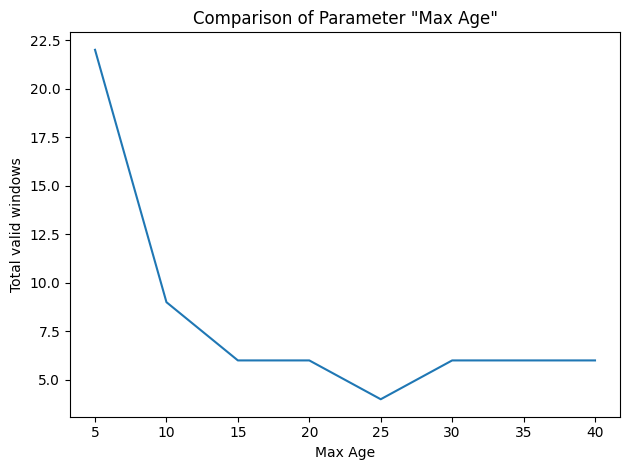

In [4]:
# Testing different max_age parameters
model = YOLO(yolo_path)
max_ages = [5, 10, 15, 20, 25, 30, 35, 40]

windows = []
for max_age in max_ages:
    print(f"Processing video with max_age={max_age}...")
    cap = cv2.VideoCapture(video_path)
    tracker = DeepSort(max_age=max_age)
    total_frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    total_frames = []
    for frame in tqdm.tqdm(range(total_frame_count), desc="Processing frames"):
        frame_records = process_frame(cap, model, tracker, frame)
        total_frames.extend(frame_records)
    cap.release()

    filtered_frames, _ = filter_frames(total_frames)

    _, valid_windows = find_valid_windows(filtered_frames, num_frames=num_frames, total_detections=total_detections)
    windows.append(len(valid_windows))

plt.figure()
plt.plot(max_ages, windows)
plt.xlabel('Max Age')
plt.ylabel('Total valid windows')
plt.title('Comparison of Parameter "Max Age"')
plt.tight_layout()
plt.show()